In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import seaborn as sns

In [2]:
US_house_data = pd.read_csv('../webscraping_open_secrets-purple-pumas-2/data/all_states.csv')

US_house_data.head()

,Candidate_name,Party,Incumbent,Winner,Raised,Spent,Cash on Hand,state
0,Jerry Carl,(R),False,True,"$1,971,321","$1,859,349","$111,973",AL01
1,James Averhart,(D),False,False,"$80,095","$78,973","$1,122",AL01
2,Barry Moore,(R),False,True,"$650,807","$669,368","-$13,633",AL02
3,Phyllis Harvey,(D),False,False,"$56,050","$55,988",$0,AL02
4,Mike D,D,True,True,"$1,193,111","$1,218,564","$502,234",AL03


In [3]:
US_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate_name  886 non-null    object
 1   Party           887 non-null    object
 2   Incumbent       887 non-null    bool  
 3   Winner          887 non-null    bool  
 4   Raised          887 non-null    object
 5   Spent           887 non-null    object
 6   Cash on Hand    887 non-null    object
 7   state           887 non-null    object
dtypes: bool(2), object(6)
memory usage: 43.4+ KB


In [4]:
US_house_data['Raised'] = US_house_data['Raised'].str.replace('\W', '')
US_house_data['Spent'] = US_house_data['Spent'].str.replace('\W', '')
US_house_data['Cash on Hand'] = US_house_data['Cash on Hand'].str.replace('\W', '')
US_house_data['Raised'] = US_house_data['Raised'].astype(int)
US_house_data['Spent'] = US_house_data['Spent'].astype(int)
US_house_data['Cash on Hand'] = US_house_data['Cash on Hand'].astype(int)

US_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate_name  886 non-null    object
 1   Party           887 non-null    object
 2   Incumbent       887 non-null    bool  
 3   Winner          887 non-null    bool  
 4   Raised          887 non-null    int64 
 5   Spent           887 non-null    int64 
 6   Cash on Hand    887 non-null    int64 
 7   state           887 non-null    object
dtypes: bool(2), int64(3), object(3)
memory usage: 43.4+ KB


<ipython-input-4-c2d21d258ba3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  US_house_data['Raised'] = US_house_data['Raised'].str.replace('\W', '')
<ipython-input-4-c2d21d258ba3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  US_house_data['Spent'] = US_house_data['Spent'].str.replace('\W', '')
<ipython-input-4-c2d21d258ba3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  US_house_data['Cash on Hand'] = US_house_data['Cash on Hand'].str.replace('\W', '')


In [5]:
US_house_data

,Candidate_name,Party,Incumbent,Winner,Raised,Spent,Cash on Hand,state
0,Jerry Carl,(R),False,True,1971321,1859349,111973,AL01
1,James Averhart,(D),False,False,80095,78973,1122,AL01
2,Barry Moore,(R),False,True,650807,669368,13633,AL02
3,Phyllis Harvey,(D),False,False,56050,55988,0,AL02
4,Mike D,D,True,True,1193111,1218564,502234,AL03
...,...,...,...,...,...,...,...,...
882,Carol Miller,(R),True,True,869210,720796,167007,WV03
883,Hilary Turner,(D),False,False,99214,98769,446,WV03
884,Belinda Fox,(I),False,False,5207,5207,0,WV03
885,Liz Cheney,(R),True,True,3003883,3060167,153567,WY01


In [6]:
US_house_data['Raised'].sum()

1664000074

In [7]:
US_house_data['Spent'].sum()

1503080240

In [8]:
US_house_data['Cash on Hand'].sum()

363186940

In [9]:
diff_raised_spent = US_house_data['Raised'].sum()-US_house_data['Spent'].sum()

In [10]:
US_house_data['Cash on Hand'].sum()-diff_raised_spent

202267106

In [17]:
US_house_data.sort_values("Raised", ascending = False).head(10)

,Candidate_name,Party,Incumbent,Winner,Raised,Spent,Cash on Hand,state
354,Steve Scalise,(R),True,True,37262827,32830607,6217720,LA01
80,Kevin McCarthy,(R),True,True,27780644,24265583,4802133,CA23
60,Nancy Pelosi,(D),True,True,27359508,22064953,6299373,CA12
78,Devin Nunes,(R),True,True,26825212,20156093,10908033,CA22
545,Alexandria Ocasio,(D),True,True,20664795,16735422,4297383,NY14
730,Dan Crenshaw,(R),True,True,19427865,17596329,1852715,TX02
90,Adam Schiff,(D),True,True,19382855,10188664,13908271,CA28
609,Jim Jordan,(R),True,True,18313823,12945651,6113812,OH04
121,Katie Porter,(D),True,True,16627706,6443700,10267752,CA45
559,Elise Stefanik,(R),True,True,13287248,11655936,1983541,NY21


Lots of overlap between high raisers and their public profile. I recognize every name on this list

In [12]:
US_house_data.groupby('Incumbent')['Winner'].value_counts(normalize = True)

Incumbent  Winner
False      False     0.880952
           True      0.119048
True       True      0.960836
           False     0.039164
Name: Winner, dtype: float64

In [13]:
US_house_data["Candidate_name"].value_counts().sum()

886

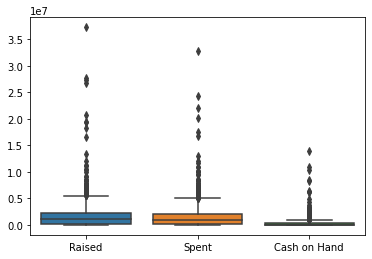

In [41]:
sns.boxplot(data = US_house_data[['Raised','Spent','Cash on Hand']]);